# Speed Performance for apex and tensorqtl

## Data Preparing

In [3]:
library("dplyr")
library("tibble")
library("readr")
library("modelr")
library("purrr")
library("tidyr")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [15]:
region = read_delim("/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wg_rds_list_final",delim = "\t")


── Column specification ────────────────────────────────────────────────────────
cols(
  `#region` = col_character(),
  chr = col_double(),
  start_position = col_double(),
  end_position = col_double()
)




In [16]:
region_output =  region%>%select(`#chr` = chr, start = start_position, end = end_position, gene_ID = `#region`)

In [6]:
region_output %>%write_delim("/mnt/mfs/statgen/neuro-apex/wg_rds_list_final",delim = "\t")

## GRM generations

In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/GRM.ipynb GRM \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/ \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --container "/mnt/mfs/statgen/containers/twas_latest.sif" \
  --job_size 1 \
  --Prefix "ROSMAP" \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/Apex_prototyping.ipynb apex_cis \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/performance/ \
  --genotype_list /mnt/mfs/statgen/neuro-apex/ROSMAP-vcf/ROSMAP_vcf_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --iteration 2 \
  --container "/mnt/mfs/statgen/containers/apex.sif" \
  --job_size 1 \
  --grm_list /mnt/mfs/statgen/neuro-apex/GRM/ROSMAP.grm_list.txt \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &



In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/Apex_TensorQTL.ipynb tensor_cis \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/performance/ \
  --genotype_list /mnt/mfs/statgen/neuro-apex/ROSMAP-vcf/ROSMAP_vcf_genotype_list.txt \
  --genotype_list_tensor /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --iteration 2 \
  --container "/mnt/mfs/statgen/containers/apex.sif" \
  --job_size 1 \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

## Time elasped for tensorQTL

In [13]:
tensor_time = read_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL_cache/time_tensorqtl",delim = " ",col_names = F)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_character()
)




In [32]:
tensor_time_elapsed = tensor_time%>%group_by(X1)%>%
summarise(tensor_cis_time = sum(X4))%>%
mutate(unit = "Min", chr  = map_dbl(X1,~read.table(text = .x , sep = ".")$V3))%>%
inner_join(region_output%>%count(`#chr`)%>%select(chr = `#chr`,n))%>%arrange(X1)

Joining, by = "chr"



In [33]:
tensor_time_elapsed

X1,tensor_cis_time,unit,chr,n
<chr>,<dbl>,<chr>,<dbl>,<int>
ROSMAP.cis_qtl_pairs.1.parquet.stdout:,15.88,Min,1,1688
ROSMAP.cis_qtl_pairs.10.parquet.stdout:,7.42,Min,10,701
ROSMAP.cis_qtl_pairs.11.parquet.stdout:,8.55,Min,11,938
ROSMAP.cis_qtl_pairs.12.parquet.stdout:,16.67,Min,12,898
ROSMAP.cis_qtl_pairs.13.parquet.stdout:,5.59,Min,13,315
ROSMAP.cis_qtl_pairs.14.parquet.stdout:,4.02,Min,14,562
ROSMAP.cis_qtl_pairs.15.parquet.stdout:,5.95,Min,15,584
ROSMAP.cis_qtl_pairs.16.parquet.stdout:,8.08,Min,16,853
ROSMAP.cis_qtl_pairs.17.parquet.stdout:,12.87,Min,17,998


## Time elasped Tensorqlt

In [6]:
ts_start = read_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL/start_time",delim = " ",col_names = F)%>%select(start_time = X8,X9)
ts_stop = read_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL/stop_time",delim = " ",col_names = F)%>%select(end_time = X8,X9)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)




In [35]:
ts_time_elapses = cbind(ts_start,ts_stop)[,1:3]%>%mutate(time_elapes = end_time - start_time, ts_time_elapes = as.numeric(time_elapes)/60)%>%select(ts_time_elapes)

In [67]:
ts_time_elapses

ts_time_elapes
<dbl>
16
9
11
7
4
7
11
8
9


## Time elasped for CIS_LMMlmm_start

In [50]:
lmm_start = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cache/lmm_start_time",delim = " ",col_names = F)%>%select(start_time = X8,X9)
lmm_stop = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cache/lmm_stop_time",delim = " ",col_names = F)%>%select(end_time = X8,X9)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)




In [39]:
lmm_time_elapses = cbind(lmm_start,lmm_stop)[,1:3]%>%mutate(time_elapes = end_time - start_time, lmm_time_elapes = as.numeric(time_elapes)/60)%>%select(lmm_time_elapes)

In [41]:
cis_start = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cis/start_time",delim = " ",col_names = F)%>%select(start_time = X8,X9)
cis_stop = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cis/stop_time",delim = " ",col_names = F)%>%select(end_time = X8,X9)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_time(format = ""),
  X9 = col_character()
)




In [68]:
ts_time_elapses

ts_time_elapes
<dbl>
16
9
11
7
4
7
11
8
9


In [55]:
cis_time_elapses = cbind(cis_start,cis_stop)[,1:3]%>%mutate(time_elapes = end_time - start_time, cis_time_elapes = as.numeric(time_elapes)/60)%>%select(cis_time_elapes)

In [89]:
apex_lmm_cis_time_elapses = lmm_time_elapses + cis_time_elapses 
apex_cis_time = cis_time_elapses

In [90]:
cis_running_time = cbind(tensor_time_elapsed,apex_cis_time,apex_lmm_cis_time_elapses,ts_time_elapses)

In [91]:
cis_running_time

X1,tensor_cis_time,unit,chr,n,cis_time_elapes,lmm_time_elapes,ts_time_elapes
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ROSMAP.cis_qtl_pairs.1.parquet.stdout:,15.88,Min,1,1688,24,34,16
ROSMAP.cis_qtl_pairs.10.parquet.stdout:,7.42,Min,10,701,13,22,9
ROSMAP.cis_qtl_pairs.11.parquet.stdout:,8.55,Min,11,938,14,20,11
ROSMAP.cis_qtl_pairs.12.parquet.stdout:,16.67,Min,12,898,13,32,7
ROSMAP.cis_qtl_pairs.13.parquet.stdout:,5.59,Min,13,315,7,26,4
ROSMAP.cis_qtl_pairs.14.parquet.stdout:,4.02,Min,14,562,8,15,7
ROSMAP.cis_qtl_pairs.15.parquet.stdout:,5.95,Min,15,584,6,15,11
ROSMAP.cis_qtl_pairs.16.parquet.stdout:,8.08,Min,16,853,8,17,8
ROSMAP.cis_qtl_pairs.17.parquet.stdout:,12.87,Min,17,998,8,17,9


In [94]:
cis_running_time

X1,tensor_cis_time,unit,chr,n,cis_time_elapes,lmm_time_elapes,ts_time_elapes
<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ROSMAP.cis_qtl_pairs.1.parquet.stdout:,15.88,Min,1,1688,24,34,16
ROSMAP.cis_qtl_pairs.10.parquet.stdout:,7.42,Min,10,701,13,22,9
ROSMAP.cis_qtl_pairs.11.parquet.stdout:,8.55,Min,11,938,14,20,11
ROSMAP.cis_qtl_pairs.12.parquet.stdout:,16.67,Min,12,898,13,32,7
ROSMAP.cis_qtl_pairs.13.parquet.stdout:,5.59,Min,13,315,7,26,4
ROSMAP.cis_qtl_pairs.14.parquet.stdout:,4.02,Min,14,562,8,15,7
ROSMAP.cis_qtl_pairs.15.parquet.stdout:,5.95,Min,15,584,6,15,11
ROSMAP.cis_qtl_pairs.16.parquet.stdout:,8.08,Min,16,853,8,17,8
ROSMAP.cis_qtl_pairs.17.parquet.stdout:,12.87,Min,17,998,8,17,9


In [95]:
cis_running_time = cis_running_time%>%
select(chr,n,unit,tensor_time = ts_time_elapes,apex_cis_time = cis_time_elapes,apex_time = lmm_time_elapes )%>%
mutate(Prefix = "ROSMAP")%>%mutate(tensor_time = 60*tensor_time/n,apex_cis_time = 60*apex_cis_time/n, apex_time = 60*apex_time/n,unit = "sec")

In [96]:
cis_running_time

chr,n,unit,tensor_time,apex_cis_time,apex_time,Prefix
<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1688,sec,0.5687204,0.8530806,1.208531,ROSMAP
10,701,sec,0.7703281,1.1126961,1.883024,ROSMAP
11,938,sec,0.7036247,0.8955224,1.279318,ROSMAP
12,898,sec,0.4677060,0.8685969,2.138085,ROSMAP
13,315,sec,0.7619048,1.3333333,4.952381,ROSMAP
14,562,sec,0.7473310,0.8540925,1.601423,ROSMAP
15,584,sec,1.1301370,0.6164384,1.541096,ROSMAP
16,853,sec,0.5627198,0.5627198,1.195780,ROSMAP
17,998,sec,0.5410822,0.4809619,1.022044,ROSMAP


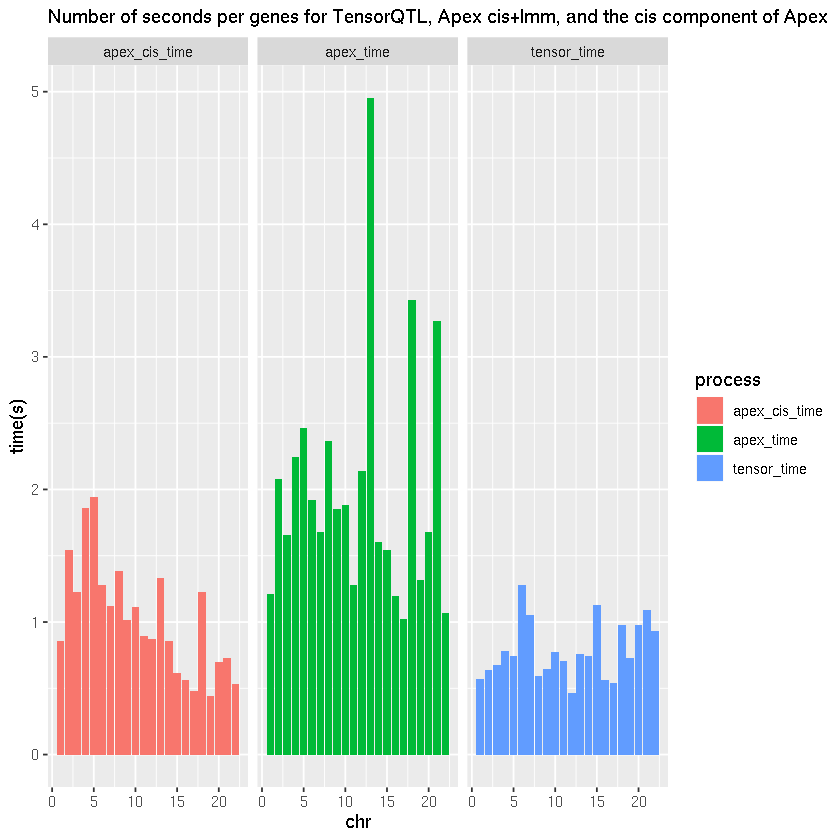

In [98]:
cis_running_time%>%pivot_longer(names_to = "process", values_to = "time(s)", col =tensor_time:apex_time )%>%
ggplot(aes(x = chr, y = `time(s)`, fill = process))+ geom_col()+facet_grid(~process)+ggtitle("Number of seconds per genes for TensorQTL, Apex cis+lmm, and the cis component of Apex")

## Result for one chromosome: 1

In [8]:
tensorQTL_result_1 = read_delim("/mnt/mfs/statgen/neuro-apex/performance/tensorQTL/ROSMAP.cis_qtl_pairs.22.emprical.cis_sumstats.txt",delim = "\t")


── Column specification ────────────────────────────────────────────────────────
cols(
  gene_ID = col_character(),
  num_var = col_double(),
  beta_shape1 = col_double(),
  beta_shape2 = col_double(),
  true_df = col_double(),
  pval_true_df = col_double(),
  variant_id = col_character(),
  tss_distance = col_double(),
  ma_samples = col_double(),
  ma_count = col_double(),
  af = col_double(),
  pval_nominal = col_double(),
  slope = col_double(),
  slope_se = col_double(),
  pval_perm = col_double(),
  pval_beta = col_double()
)




In [12]:
tensorQTL_result_1%>%mutate(pval = p.adjust(pval_beta,method = "fdr"))%>%filter(pval < 0.05)

gene_ID,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,af,pval_nominal,slope,slope_se,pval_perm,pval_beta,pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000100181,3712,0.9755961,722.2007,568.4045,1.836792e-05,22:17087656_A_C,485768,414,520,0.60833335,4.106795e-06,0.38046557,0.081906400,0.01629837,1.479391e-02,3.439203e-02
ENSG00000283633,3712,0.9934548,946.7891,602.6243,4.022086e-12,22:17087656_A_C,485744,414,520,0.60833335,4.394049e-13,0.25248000,0.034152370,0.00009999,4.335157e-09,2.015624e-08
ENSG00000237438,5829,1.0205106,1526.2461,615.5758,1.184451e-58,22:17538082_A_C,501511,294,355,0.73268074,1.763683e-62,-0.47623740,0.025571778,0.00009999,1.350563e-56,3.582965e-55
ENSG00000273203,5919,0.9976257,1295.5015,592.2513,5.435984e-14,22:17522728_A_G,454906,139,151,0.11370482,2.341249e-15,-0.21838503,0.026901390,0.00009999,7.451710e-11,4.098440e-10
ENSG00000235478,6199,0.9854250,1141.7075,568.4062,4.099460e-33,22:17612604_C_T,491043,72,73,0.05496988,5.168236e-38,-0.64968120,0.047233842,0.00009999,1.260104e-29,2.104840e-28
ENSG00000093072,6441,1.0349118,1352.5741,590.0211,1.762604e-20,22:17683675_G_T,504884,383,463,0.65135545,1.260541e-22,0.16171095,0.015915401,0.00009999,6.171855e-18,5.680626e-17
ENSG00000099968,8225,1.0223255,1873.0048,614.1864,1.839337e-20,22:18212923_A_G,584067,219,239,0.17996988,8.875042e-22,-0.14767500,0.014858515,0.00009999,1.463838e-17,1.222576e-16
ENSG00000183785,8104,0.8616652,568.4453,465.2264,3.181515e-09,22:18589842_A_G,479510,374,453,0.65888554,1.942615e-12,0.09632277,0.013422620,0.00029997,1.186665e-05,3.993924e-05
ENSG00000280007,8104,0.7175466,347.0438,433.0476,2.219126e-08,22:18591993_A_G,481233,373,452,0.65963860,5.516035e-12,0.10485820,0.014935327,0.00069993,2.348073e-04,6.966979e-04


In [13]:
Apex_result = read_delim("/mnt/mfs/statgen/neuro-apex/performance/cis/ROSMAP.22.cis_gene_table.txt.gz",delim = "\t",col_names = T)


── Column specification ────────────────────────────────────────────────────────
cols(
  `#chrom` = col_double(),
  start = col_double(),
  end = col_double(),
  gene = col_character(),
  egene_pval = col_double(),
  n_samples = col_double(),
  n_covar = col_double(),
  resid_sd = col_double(),
  n_cis_variants = col_double()
)




In [17]:
Apex_result%>%mutate(gene_pval = p.adjust(egene_pval,method = "fdr"))%>%filter(gene_pval < 0.05)

#chrom,start,end,gene,egene_pval,n_samples,n_covar,resid_sd,n_cis_variants,gene_pval
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,16601887,16601888,ENSG00000100181,5.61596e-03,664,6,0.99263800,12830,7.793224e-03
22,16601911,16601912,ENSG00000283633,2.36099e-09,664,6,0.80040700,12830,8.450845e-09
22,17036570,17036571,ENSG00000237438,1.94310e-58,664,6,0.98527300,21133,5.477113e-57
22,17067821,17067822,ENSG00000273203,2.32497e-10,664,6,0.61237300,21522,9.197908e-10
22,17084954,17084955,ENSG00000177663,5.03245e-09,664,6,0.57266300,21746,1.759407e-08
22,17116297,17116298,ENSG00000183307,8.19419e-04,664,6,0.55698200,22311,1.329345e-03
22,17121560,17121561,ENSG00000235478,2.90386e-31,664,6,0.59253800,22417,4.677289e-30
22,17178790,17178791,ENSG00000093072,2.37274e-18,664,6,0.78967100,23316,1.845010e-17
22,17359949,17359950,ENSG00000099954,1.40833e-05,664,6,0.75081100,25935,2.900259e-05


In [15]:
vis = rbind(Apex_result%>%mutate(gene_pval = p.adjust(egene_pval,method = "fdr"))%>%select(gene_pval)%>%mutate(Method = "Apex"),
tensorQTL_result_1%>%mutate(gene_pval = p.adjust(pval_perm,method = "fdr"))%>%select(gene_pval)%>%mutate(Method = "TensorQTL"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



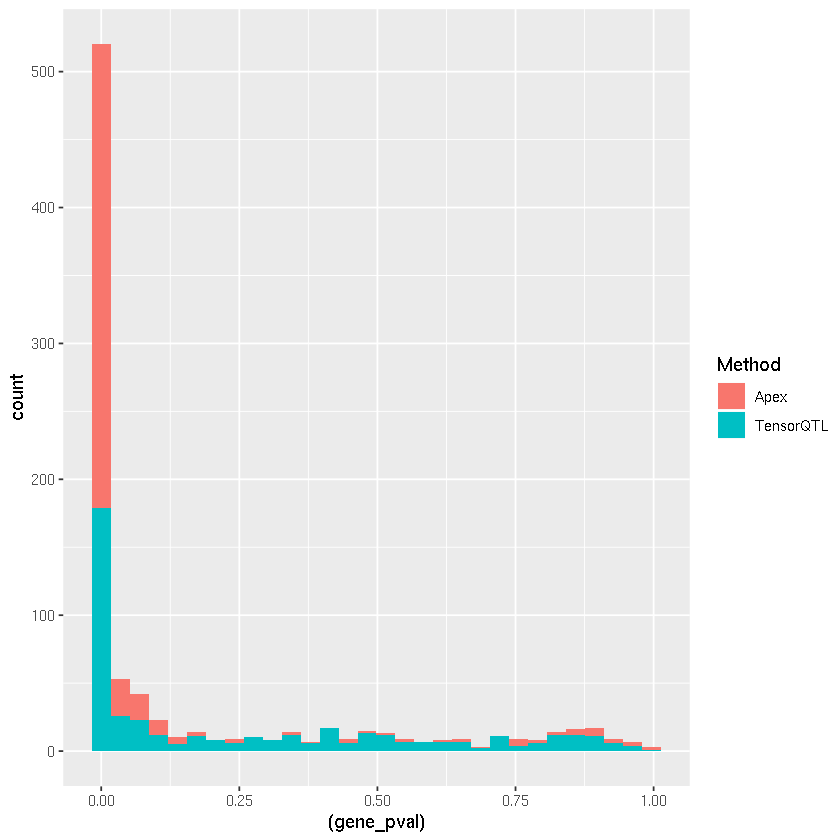

In [16]:
vis%>%filter(gene_pval < 1)%>%ggplot(aes(x = (gene_pval),fill = Method) )+geom_histogram()

In [ ]:
nohup sos run ~/GIT/neuro-apex/workflow/Apex_TensorQTL.ipynb Residual_Expression \
  --molecular_pheno_whole  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /mnt/mfs/statgen/neuro-apex/performance/ \
  --genotype_list /mnt/mfs/statgen/neuro-apex/ROSMAP-vcf/ROSMAP_vcf_genotype_list.txt \
  --genotype_list_tensor /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list "/mnt/mfs/statgen/neuro-apex/wg_rds_list_final" \
  --iteration 2 \
  --container "/mnt/mfs/statgen/containers/apex.sif" \
  --job_size 1 \
  -J 50 -q csg -c ~/GIT/neuro-twas/code/csg.yml -s build &

In [39]:
susie_gene_cand = read_delim("/mnt/mfs/statgen/neuro-apex/wg_rds_list_final","\t" ) 


── Column specification ────────────────────────────────────────────────────────
cols(
  `#chr` = col_double(),
  start = col_double(),
  end = col_double(),
  gene_ID = col_character()
)




In [40]:
susie_gene_cand%>%filter(susie_gene_cand == 22)%>%write_delim("/mnt/mfs/statgen/neuro-apex/performance/data/rgs_22.txt",delim = "\t")

In [37]:
line_num = system("awk '($4==\"ENSG00000279933\") {print NR}' /mnt/mfs/statgen/neuro-apex/performance/data/ROSMAP.mol_phe.resid.bed", intern=T)



In [ ]:
nohup sos run ~/GIT/neuro-twas/workflow/uni_susie.ipynb susie  \
  --molecular-pheno  /mnt/mfs/statgen/neuro-apex/performance/data/ROSMAP.mol_phe.resid.bed   \
  --wd /mnt/mfs/statgen/neuro-apex/performance/susie/ \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /mnt/mfs/statgen/neuro-apex/performance/data/rgs_22.txt \
  --region_name 1 \
  --data_start 2 \
  --window 1000000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  -J 50 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &

In [53]:
susie = attach("/mnt/mfs/statgen/neuro-apex/performance/susie/susie.RData")

In [62]:
a = susie$output$env[[1]]

In [69]:
a$full_model$sets

$cs
NULL

$coverage
NULL

$requested_coverage
[1] 0.95

In [64]:
b = susie$output

In [78]:
b = b%>%mutate(model = map(env,~.x$full_model),
               sets = map(model,~.x$sets),
               cs = map(sets,~.x$cs),
               n_cs = map_dbl(cs,~.x%>%length())
              )

In [88]:
susie_passed_gene = b%>%select(gene_ID,cs,n_cs)%>%filter(n_cs != 0)%>%pull(gene_ID)
tensor_qtl_passed_gene = tensorQTL_result_1%>%mutate(pval = p.adjust(pval_beta,method = "fdr"))%>%filter(pval < 0.05)%>%pull(gene_ID)
Apex_passed_gene = Apex_result%>%mutate(gene_pval = p.adjust(egene_pval,method = "fdr"))%>%filter(gene_pval < 0.05)%>%pull(gene)

In [91]:
save = list(susie_passed_gene = susie_passed_gene,tensor_qtl_passed_gene = tensor_qtl_passed_gene, Apex_passed_gene = Apex_passed_gene)


In [92]:
save%>%saveRDS("~/tensorqtl_comparison")

ERROR: Error in library("RVenn"): there is no package called ‘RVenn’
